In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [82]:
data = pd.read_csv('/Users/anshulsharma/Downloads/Amazon Sale Report.csv')



/var/folders/kn/12bbq1z17cx80rcml47vy5rh0000gn/T/ipykernel_11223/1836750787.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/anshulsharma/Downloads/Amazon Sale Report.csv')









# Introduction to Data













In [83]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

# Data Cleaning

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [85]:
data.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [86]:
data.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


# Data Visualisation

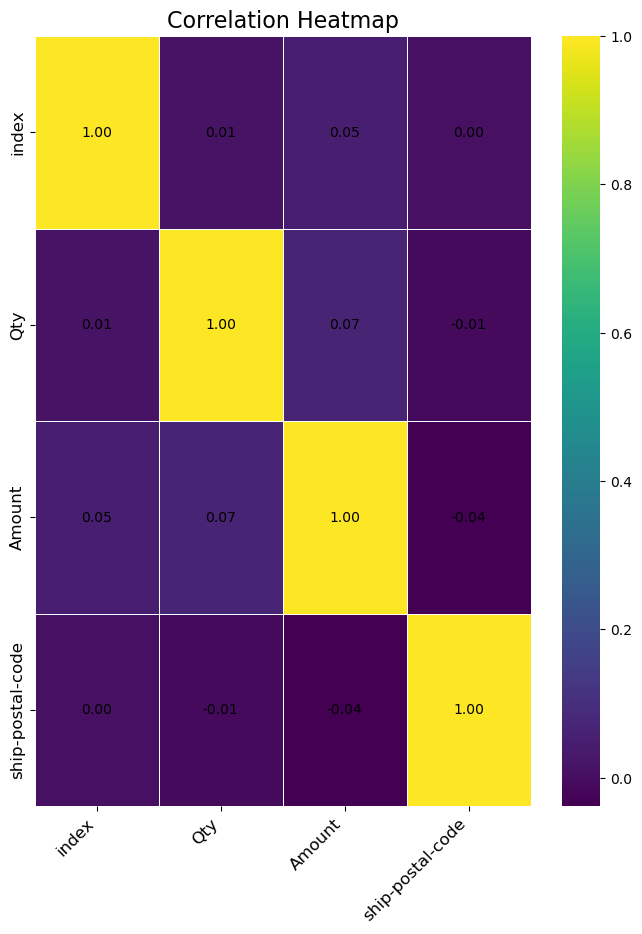

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 10))

# Change 'viridis' to the desired colormap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, annot_kws={"color": 'black'})

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [88]:
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [89]:
# Convert INR to USD using an exchange rate of 1 INR = 0.014 USD
exchange_rate = 0.0120988
data['Amount '] = data['Amount'].apply(lambda x: x * exchange_rate)

In [90]:
data['B2B'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

In [91]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Amount
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,customer,Easy Ship,NaN,7.835425
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer,Easy Ship,NaN,4.912113
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business,NaN,NaN,3.980505
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,customer,Easy Ship,NaN,9.114389
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,customer,NaN,NaN,6.944711


In [92]:
data['Date'] = pd.to_datetime(data['Date'])

/var/folders/kn/12bbq1z17cx80rcml47vy5rh0000gn/T/ipykernel_11223/1453708669.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [93]:
data['month'] = data['Date'].dt.month
data['month'].unique()

array([4, 3, 5, 6], dtype=int32)

In [94]:
months = ['march','April', 'May', 'June']
data['month'].replace([3,4,5,6],months, inplace = True)

In [95]:
print(f'The earliest date is {data["Date"].min()}')
print(f'The latest date is {data["Date"].max()}')

The earliest date is 2022-03-31 00:00:00
The latest date is 2022-06-29 00:00:00


In [96]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Amount,month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,customer,Easy Ship,NaN,7.835425,April
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,customer,Easy Ship,NaN,4.912113,April
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,business,NaN,NaN,3.980505,April
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,customer,Easy Ship,NaN,9.114389,April
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,CHENNAI,TAMIL NADU,600073.0,IN,NaN,customer,NaN,NaN,6.944711,April


In [97]:
# 1. Groupby and Sum of Amount by Category
category_sum = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

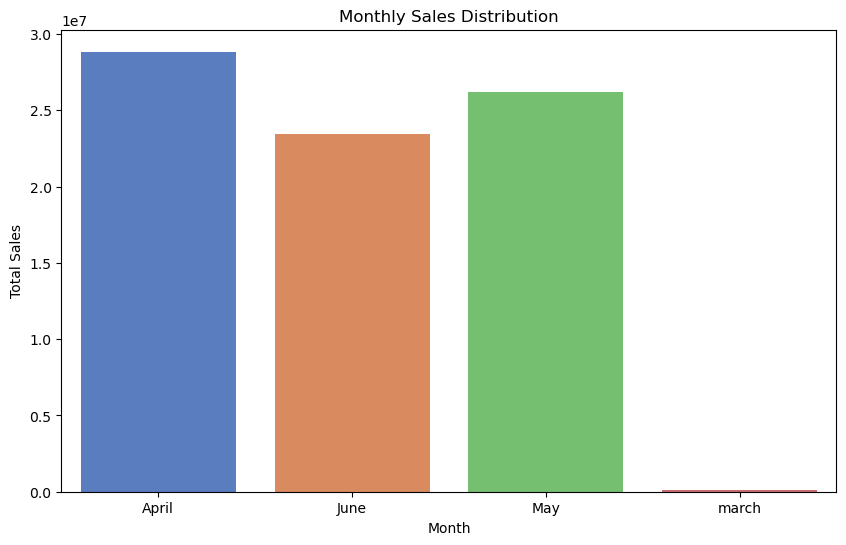

In [98]:
# 2. Monthly Sales Distribution
monthly_sales = data.groupby('month')['Amount'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='muted')  # Change 'muted' to any other palette
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

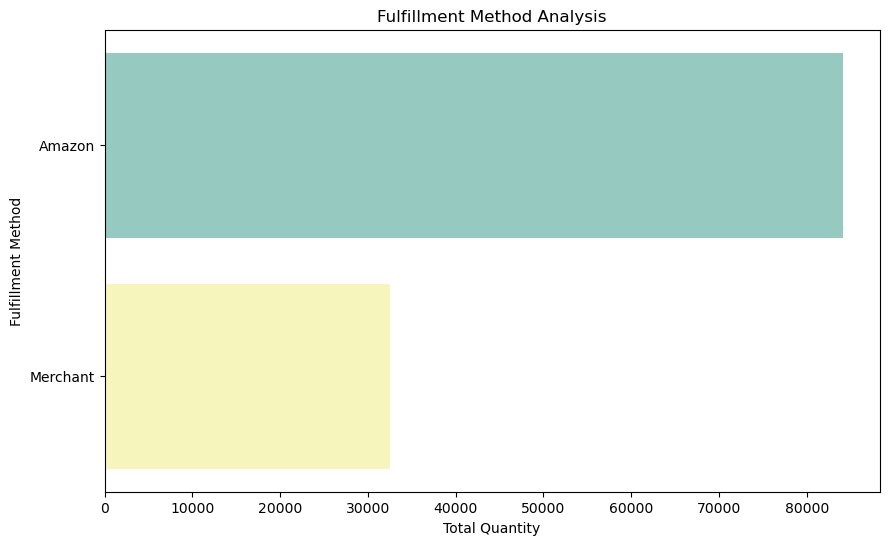

In [99]:
# 3. Fulfillment Method Analysis
fulfillment_method = data.groupby('Fulfilment')['Qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=fulfillment_method.values, y=fulfillment_method.index, palette='Set3', orient='h')  # Change 'Set3' to any other seaborn color palette
plt.title('Fulfillment Method Analysis')
plt.xlabel('Total Quantity')
plt.ylabel('Fulfillment Method')
plt.show()

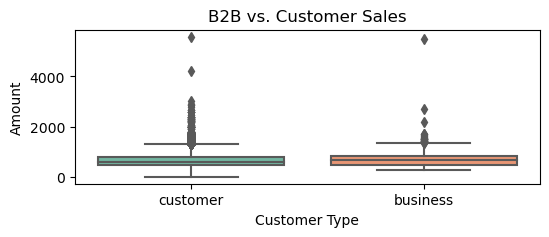

In [100]:
 # 4. B2B vs. Customer Sales
plt.figure(figsize=(6, 2))
sns.boxplot(x='B2B', y='Amount', data=data, palette='Set2')  # Change 'Set2' to any other seaborn color palette
plt.title('B2B vs. Customer Sales')
plt.xlabel('Customer Type')
plt.ylabel('Amount')
plt.show()
